In [3]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates
%matplotlib inline

In [1]:
def imabs(complexNum):
    return 2*abs(complexNum)/float(4096)

def imarg(complexNum):
    return math.atan2(complexNum.imag,complexNum.real)

def sine_wave(time,amp,freq,phi,damp):
    return ((math.exp(-1*damp*time))*
            (amp*math.sin(2*math.pi*freq*time-phi)))

In [2]:
def calc_resid(obs,pred):
    return obs-pred

In [4]:
index = pd.date_range('2000-01-01', periods=4096, freq='D')
waveDF = pd.DataFrame(mdates.date2num(index), columns=['time'])
waveDF['When Reported'] = index

In [7]:
amps = [2,8,15,3,6,2.5,9,12,20]
freqs = [.0002,.223,.3213,.0043,.0012,.1,.256,.1111,.00005]
phis = [.4,.3,.5,1.2,.9,.6,.6,.6,.3]
k=1

for i in range(len(amps)):
    amp = amps[i]
    freq = freqs[i]
    phi = phis[i]
    damp=0
    
    waveDF['SineValues%d' %int(k)]= waveDF.apply(lambda row: sine_wave(row['time'],amp,freq,phi,damp),axis=1)
    k+=1

In [8]:
interval1 = waveDF.copy()

In [9]:
del interval1['time']
del interval1['When Reported']

In [11]:
waveDF['byDay'] = interval1.sum(axis=1);

In [12]:
byDay = pd.Series(waveDF['byDay'],index = waveDF['When Reported'])

In [14]:
byDay[0:] = waveDF['byDay']

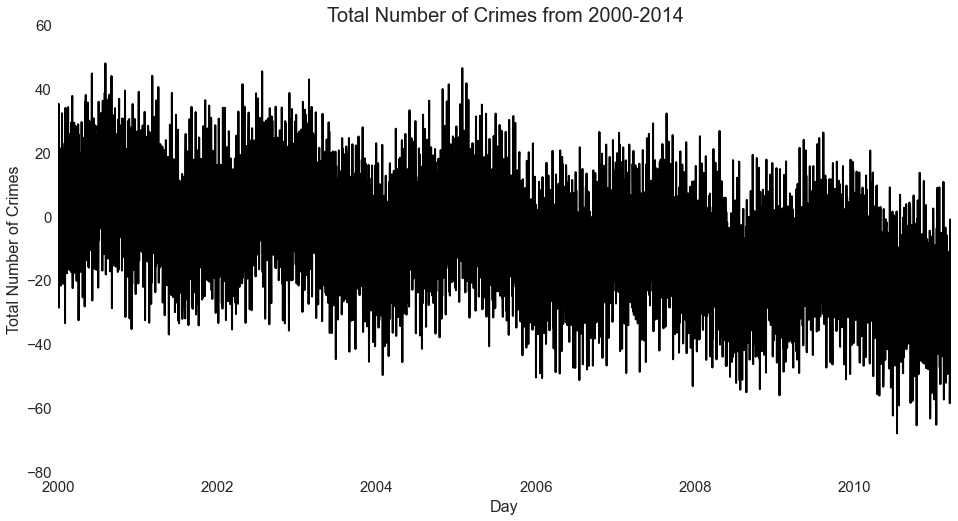

In [17]:
figure = plt.figure(figsize=(16,8))
TSPlot = byDay.plot(linewidth=2, c='black')

TSPlot.set_ylabel('Total Number of Crimes', fontsize=16)
TSPlot.set_xlabel('Day',fontsize=16)
TSPlot.set_title('Total Number of Crimes from 2000-2014',fontsize=20)
plt.tick_params(axis='both', labelsize=15)

In [18]:
ffts = {'1stWindow':np.fft.fft(byDay)}

In [19]:
harmonicDF = pd.DataFrame(ffts)

In [20]:
harmonicDF['peakAmp1']= harmonicDF.apply(lambda row: imabs(row['1stWindow']), axis=1)

In [21]:
harmonicDF['peakAmp1'][0] = 0
harmonicDF['peakAmp1'][2047] = abs(harmonicDF['1stWindow'][2047])

In [22]:
harmonicDF['k'] = np.arange(len(harmonicDF))

In [23]:
harmonicDF['freq'] = harmonicDF['k']/(4096)

In [24]:
harmonicDF['phase(rad)1']= harmonicDF.apply(lambda row: imarg(row['1stWindow']), axis=1)

In [25]:
peakDF = harmonicDF.filter(regex='peakAmp1')

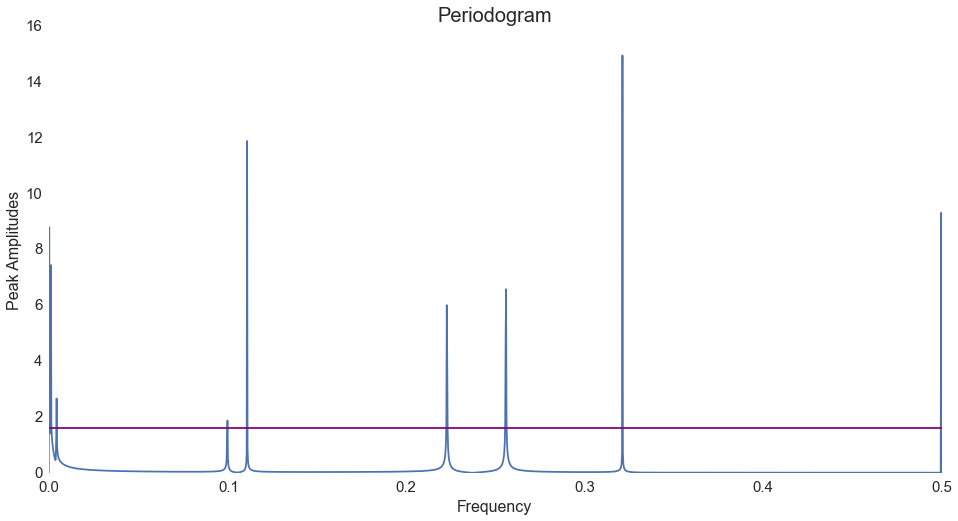

In [27]:
figure = plt.figure(figsize = (16,8))
plt.plot(harmonicDF['freq'], harmonicDF['peakAmp1'])
plt.xlim(0,.5)
plt.axhline(1.6,0, color='purple')
plt.ylabel('Peak Amplitudes', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.tick_params(axis='both', labelsize=15)
plt.title('Periodogram', fontsize = 20);

In [28]:
index = pd.date_range('2000-01-01', periods=4096, freq='D')
waveDFtest = pd.DataFrame(mdates.date2num(index), columns=['time'])
waveDFtest['When Reported'] = index

In [29]:
peakDFsorted = peakDF.sort(['peakAmp1'],ascending=False);
amp1st = peakDFsorted['peakAmp1'][1:43]

In [30]:
amp1st

1316    14.959418
455     11.893896
3641    11.893896
2047     9.316681
4095     8.804100
1        8.804100
5        7.444157
4091     7.444157
3047     6.578992
1049     6.578992
913      6.009115
3183     6.009115
1048     4.818297
3048     4.818297
3182     4.096305
914      4.096305
4094     3.760090
2        3.760090
18       2.662286
4078     2.662286
4093     2.339194
3        2.339194
3046     1.968691
1050     1.968691
3686     1.870723
410      1.870723
3184     1.760054
912      1.760054
1047     1.751871
3049     1.751871
4090     1.738198
6        1.738198
3181     1.506301
915      1.506301
4092     1.409833
4        1.409833
4089     1.329592
7        1.329592
409      1.282678
3687     1.282678
4079     1.188871
17       1.188871
Name: peakAmp1, dtype: float64

In [32]:
indices = [1316,455,2047,1,5,1049,913,1048,914,2,18,3]
k=1

for j in range(len(indices)):
    amp = harmonicDF['peakAmp1'][indices[j]]
    freq = harmonicDF['freq'][indices[j]]
    phi = harmonicDF['phase(rad)1'][indices[j]]
    damp=0
    
    waveDFtest['SineValues%d' %int(k)]= waveDFtest.apply(lambda row: sine_wave(row['time'],amp,freq,phi,damp),axis=1)
    k+=1

In [35]:
interval2 = waveDFtest.copy()

In [36]:
del interval2['time']
del interval2['When Reported']

In [37]:
waveDFtest['agWave'] = (interval2.sum(axis=1))

In [38]:
wave2 = pd.Series(waveDFtest['agWave'],index=waveDFtest['When Reported'])
wave2[0:] = waveDFtest['agWave']

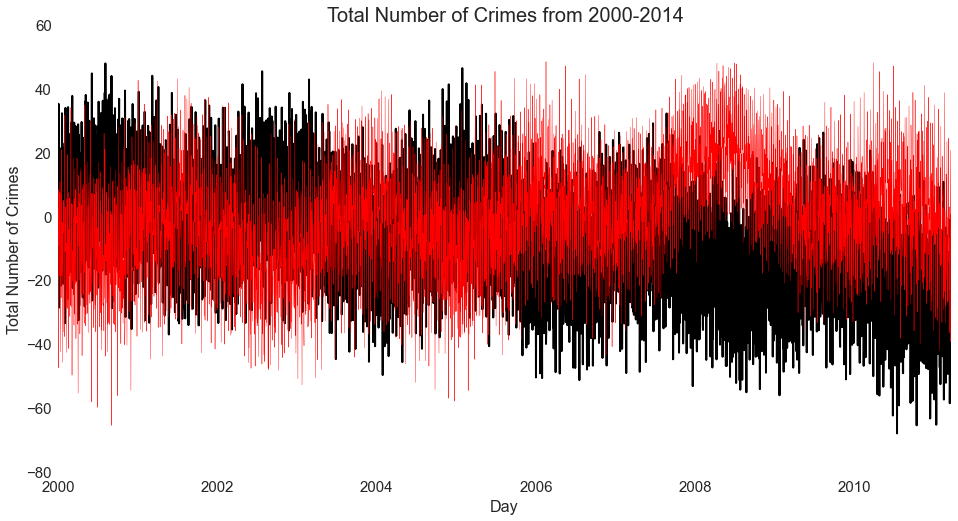

In [39]:
figure = plt.figure(figsize=(16,8))
TSPlot = byDay.plot(linewidth=2, c='black')
wave2.plot(linewidth=.4,c='red')

TSPlot.set_ylabel('Total Number of Crimes', fontsize=16)
TSPlot.set_xlabel('Day',fontsize=16)
TSPlot.set_title('Total Number of Crimes from 2000-2014',fontsize=20)
plt.tick_params(axis='both', labelsize=15)